<a href="https://colab.research.google.com/github/vishnuaswanth/ML_projects/blob/main/Miniproject_team2_M4_MP1_NB_Traffic_sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Mini Project: Image classification using MLP and CNN



## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement CNN using keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [ ]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

###**Excercise 1**

### Data Loading and Feature Extraction (1 points)

#### Get the features and labels of data

* Extract the features of the images
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

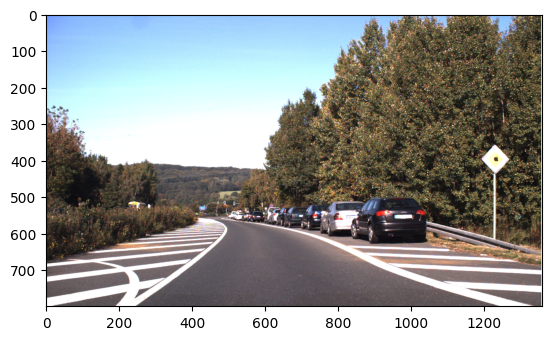

In [ ]:



# Make sure the path is correct and the file exists
img_path = "/content/FullIJCNN2013/00010.ppm"

# Use cv2.imread to read the image
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Could not read image from {img_path}. Check if the path is correct and the file exists.")
else:
    # Convert the image from BGR (OpenCV default) to RGB (Matplotlib expects)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.show()

In [ ]:
def list_folders_only(directory):
    """Lists only the folder names from a given directory.

    Args:
        directory: The path to the directory to be scanned.

    Returns:
        A list of folder names.
    """

    folder_names = []
    for item in os.listdir(directory):
        full_path = os.path.join(directory, item)
        if os.path.isdir(full_path):
            folder_names.append(item)
    return folder_names

In [ ]:
import os
import tensorflow as tf

# Define the directory containing the dataset
data_dir = '/content/FullIJCNN2013'

class_names = sorted(list_folders_only(data_dir))


# Create lists to store images and labels
images = []
labels = []

# Iterate through each category directory
for label, class_name in enumerate(class_names):
    class_dir = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Iterate through each file in the category directory
    for file_name in os.listdir(class_dir):
        if file_name.endswith('.ppm'):
            file_path = os.path.join(class_dir, file_name)

            # Load the image using OpenCV as PPM is not directly supported by TensorFlow
            img = cv2.imread(file_path)

            # OpenCV loads images in BGR format, convert to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Convert to TensorFlow tensor and resize
            img = tf.convert_to_tensor(img)
            img = tf.image.resize(img, [30, 30])

            images.append(img)
            labels.append(label)


In [ ]:
actual_class_names = {
    0: "speed limit 20 (prohibitory)",
    1: "speed limit 30 (prohibitory)",
    2: "speed limit 50 (prohibitory)",
    3: "speed limit 60 (prohibitory)",
    4: "speed limit 70 (prohibitory)",
    5: "speed limit 80 (prohibitory)",
    6: "restriction ends 80 (other)",
    7: "speed limit 100 (prohibitory)",
    8: "speed limit 120 (prohibitory)",
    9: "no overtaking (prohibitory)",
    10: "no overtaking (trucks) (prohibitory)",
    11: "priority at next intersection (danger)",
    12: "priority road (other)",
    13: "give way (other)",
    14: "stop (other)",
    15: "no traffic both ways (prohibitory)",
    16: "no trucks (prohibitory)",
    17: "no entry (other)",
    18: "danger (danger)",
    19: "bend left (danger)",
    20: "bend right (danger)",
    21: "bend (danger)",
    22: "uneven road (danger)",
    23: "slippery road (danger)",
    24: "road narrows (danger)",
    25: "construction (danger)",
    26: "traffic signal (danger)",
    27: "pedestrian crossing (danger)",
    28: "school crossing (danger)",
    29: "cycles crossing (danger)",
    30: "snow (danger)",
    31: "animals (danger)",
    32: "restriction ends (other)",
    33: "go right (mandatory)",
    34: "go left (mandatory)",
    35: "go straight (mandatory)",
    36: "go right or straight (mandatory)",
    37: "go left or straight (mandatory)",
    38: "keep right (mandatory)",
    39: "keep left (mandatory)",
    40: "roundabout (mandatory)",
    41: "restriction ends (overtaking) (other)",
    42: "restriction ends (overtaking (trucks)) (other)"
}

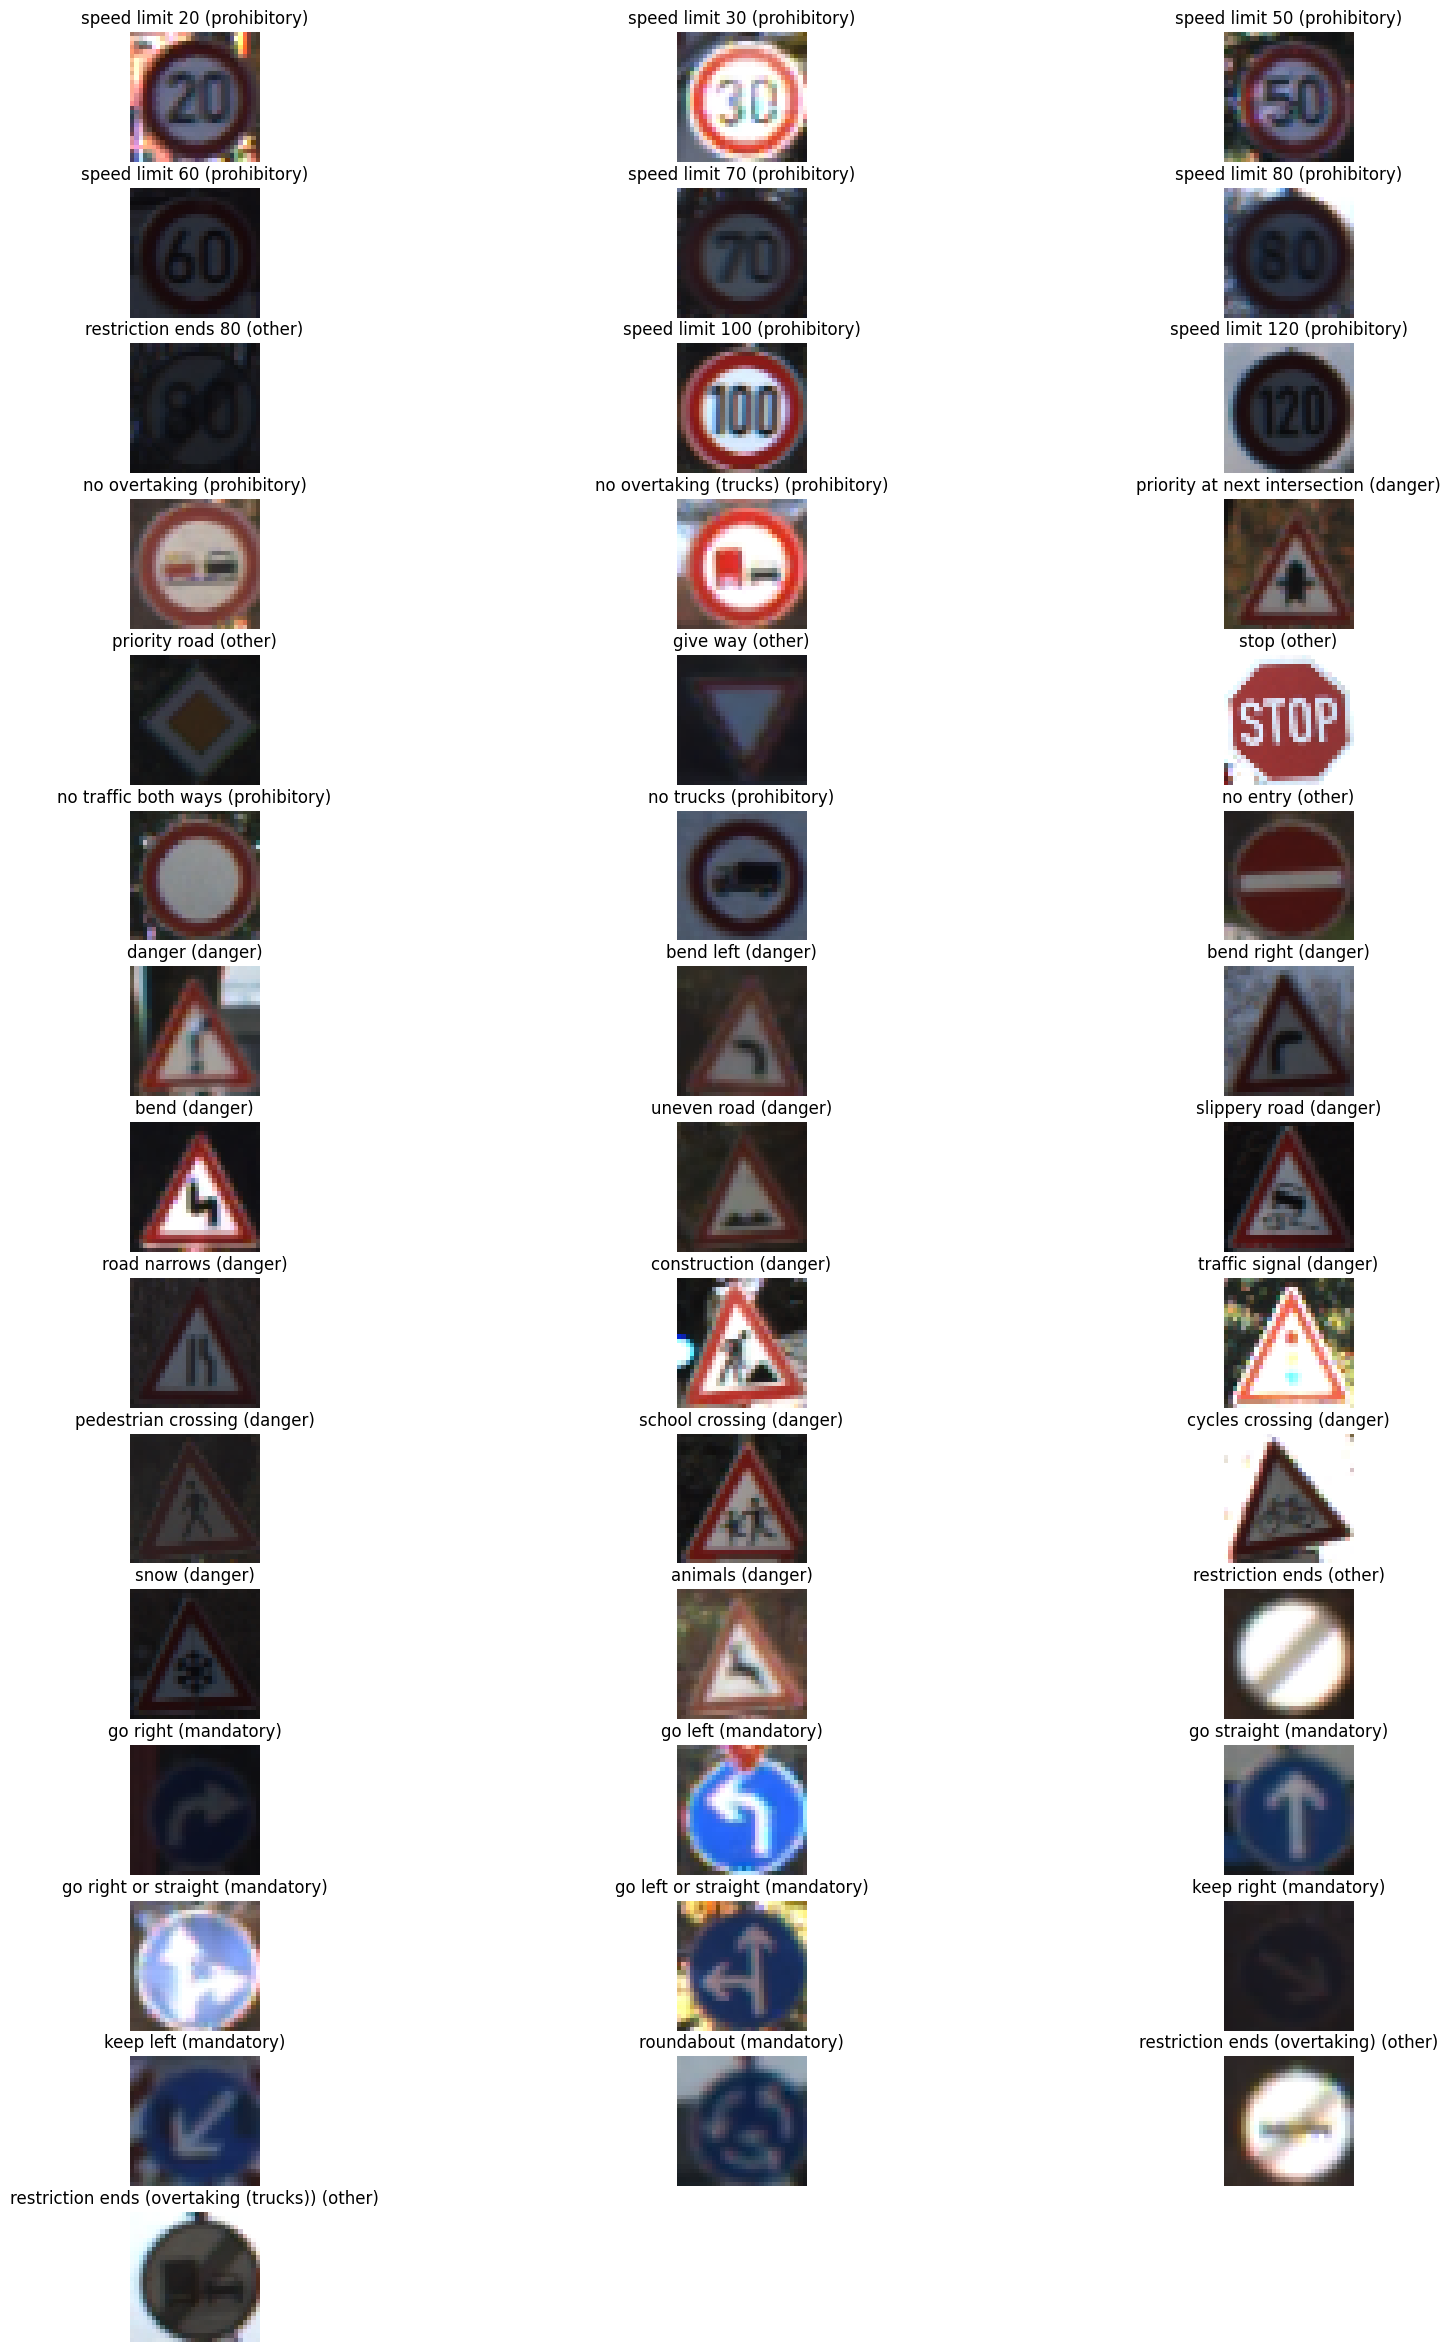

In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store one image per category
category_images = {}

# Iterate through the dataset
for image, label in zip(images, labels):
    # label = label.numpy()
    if label not in category_images:
        category_images[label] = image.numpy()
    if len(category_images) == len(class_names):
        break  # Stop when we have one image from each category

# Plotting one image per category
plt.figure(figsize=(20, 30))
for i, label in enumerate(category_images):
    plt.subplot(15, 3, i + 1)  # Adjust the grid size based on the number of categories
    plt.imshow(category_images[label].astype("uint8"))
    plt.title(actual_class_names[label])
    plt.axis('off')

plt.show()


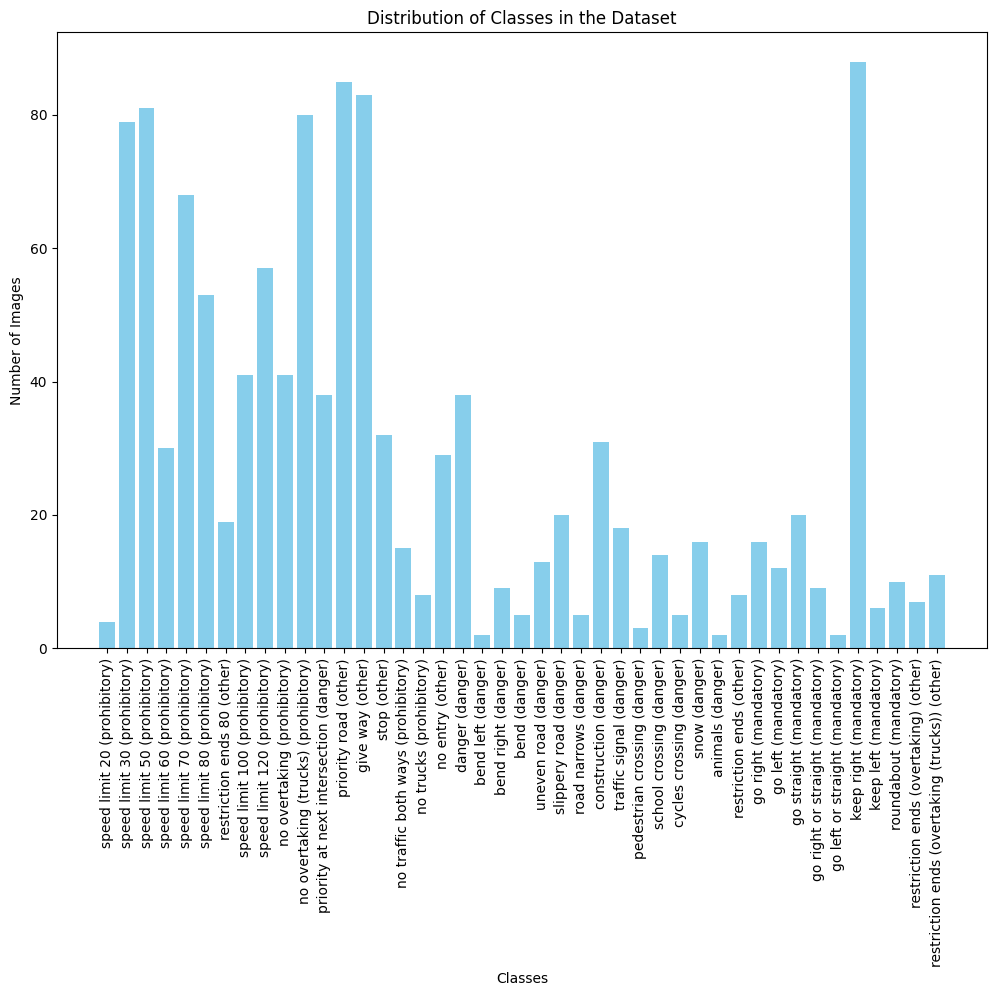

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

labels_list = labels
# for _, label in dataset:
#     labels.append(label.numpy())


# Count the occurrences of each class label
label_counts = Counter(labels_list)

# Map label indices to class names
class_names_list = [actual_class_names[i] for i in range(len(set(labels_list)))]

# Create a list of counts in the order of class_names
counts = [label_counts[i] for i in range(len(class_names_list))]

# Plotting the distribution
plt.figure(figsize=(12, 8))
plt.bar(class_names_list, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in the Dataset')
plt.xticks(rotation=90)  # Rotate class names for better visibility
plt.show()

###**Excercise 2**
### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

#### Plot the distribution of Classes

In [ ]:
# YOUR CODE HERE


#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import normalize

images = tf.stack(images)
# labels = tf.convert_to_tensor(labels)

# Assuming 'images' is a NumPy array of shape (num_images, height, width, channels)
images_normalized = normalize(images.numpy().reshape(images.shape[0], -1), axis=1)

# # Reshape back to original image dimensions
# images_normalized = images_normalized.reshape(images.shape)

# Convert back to TensorFlow tensor
images_normalized_tf = tf.convert_to_tensor(images_normalized)

# Update the dataset with normalized images
dataset = tf.data.Dataset.from_tensor_slices((images_normalized_tf, labels))

In [ ]:
# Assuming 'dataset' is a TensorFlow dataset
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Shuffle the dataset before splitting
dataset = dataset.shuffle(buffer_size=len(dataset), seed=42)

# Split the dataset
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size).take(test_size)

In [ ]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(2700,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [ ]:
images_normalized_tf.shape

TensorShape([1213, 2700])

###**Excercise 3**
### Train the MLP classifier on features (3 points)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics



* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
# Step 1 - Build the architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=images_normalized_tf.shape[1]))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(len(class_names), activation='softmax'))  # Output layer (number of classes)

# Step 2 - Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 3 - Fit and Evaluate the model
model.fit(train_dataset.batch(10), epochs=30)  # Adjust batch size and epochs as needed
loss, accuracy = model.evaluate(test_dataset.batch(10))
print("Test accuracy:", accuracy)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0858 - loss: 3.6224
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1404 - loss: 3.2245
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2211 - loss: 2.9280
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3158 - loss: 2.5874
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3843 - loss: 2.2762
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3895 - loss: 1.9939
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4761 - loss: 1.8146
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5075 - loss: 1.7089
Epoch 9/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6052 - loss: 1.4541
Epoch 10/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5912 - loss: 1.3977
Epoch 11/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6531 - loss: 1.2659
Epoch 12/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6379 - loss: 1.25

#### Try the different algorithms and compare the results with MLP classifier


### Train a CNN classifier on images (4 points)

* Split the data into train and test

* Train the CNN with 2D convolution and Maxpooling layers

* Get the accuracy score on train and test sets



* Define the keras model and initialize the layers
  - Ensure the input layer is specified with correct image size as input. This can be specified when creating the first layer with the input_shape argument.
* Speicify number of filters Kernel size, Pool size and activation function
  - filters,kernel_size and activation arguments of Conv2D layer can be used
  - pool_size argument of MaxPool2D can be used to set Pool size
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Reshape the images in the datasets
def reshape_images(image, label):
    image = tf.reshape(image, (30, 30, 3))  # Reshape to 30x30x3
    return image, label

train_dataset = train_dataset.map(reshape_images)
test_dataset = test_dataset.map(reshape_images)

In [ ]:
# Step 1 - Build the architecture
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))  # Input shape matches image dimensions
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())  # Flatten before dense layers
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(len(class_names), activation='softmax'))  # Output layer (number of classes)

# Step 2 - Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3 - Fit and Evaluate the model
# Assuming 'train_dataset' and 'test_dataset' are TensorFlow datasets with image data
cnn_model.fit(train_dataset.batch(10), epochs=30)  # Adjust batch size and epochs as needed
_, accuracy = cnn_model.evaluate(test_dataset.batch(10))
print("Test accuracy:", accuracy)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0620 - loss: 3.5914
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0654 - loss: 3.3820
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0854 - loss: 3.3734
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1476 - loss: 3.2386
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2120 - loss: 3.0396
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3620 - loss: 2.6333
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4071 - loss: 2.2001
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4925 - loss: 1.8114
Epoch 9/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6207 - loss: 1.5359
Epoch 10/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6764 - loss: 1.1699
Epoch 11/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7315 - loss: 1.0052
Epoch 12/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7132 - l

In [ ]:
# Step 1 - Build the architecture
# YOUR CODE HERE

In [ ]:
# Step 2 - Compile the model
# YOUR CODE HERE

In [ ]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE